In [70]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


,x0,x1,x2,x3,y
0,-331.070808,-9.502577,1150.546337,41.414802,0
1,8.373484,118.055035,3285.208972,-208.646805,0
2,-331.069064,-13.001692,-170.948896,-48.085035,0
3,-322.432286,2.513188,1344.314314,31.998978,0
4,NaN,-17.557358,672.131651,20.300037,0


In [43]:
missing_values = df.isnull().sum()
missing_values

x0    49
x1    37
x2    44
x3    43
y      0
dtype: int64

In [44]:
df.shape

(1000, 5)

In [45]:
total_cell = np.product(df.shape)
total_missing = missing_values.sum()

print(100*total_missing/total_cell)

3.46


In [46]:
df.dropna(inplace=True)

In [47]:
df.shape

(837, 5)

In [48]:
df.describe()

,x0,x1,x2,x3,y
count,837.000000,837.000000,837.000000,837.000000,837.000000
mean,-152.205146,50.986555,1813.539768,-113.444426,0.105137
std,182.416601,61.306679,1310.728462,121.353120,0.306914
min,-394.163918,-38.596430,-1338.242598,-282.945736,0.000000
25%,-330.365065,-10.579289,708.659298,-221.699401,0.000000
50%,-293.288853,86.926834,1339.378608,-198.238340,0.000000
75%,30.476523,109.988455,3132.438837,15.069228,0.000000
max,109.115156,140.879879,3947.692814,83.706282,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      837 non-null    float64
 1   x1      837 non-null    float64
 2   x2      837 non-null    float64
 3   x3      837 non-null    float64
 4   y       837 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


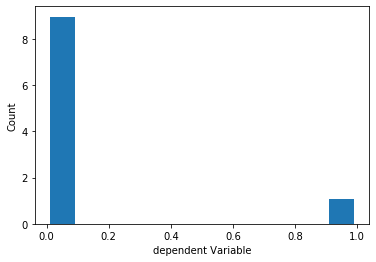

In [50]:
plt.hist(df.y,density=True,rwidth=0.8)
plt.xlabel('dependent Variable')
plt.ylabel('Count')
plt.show()

In [51]:
df['y'].value_counts()

0    749
1     88
Name: y, dtype: int64

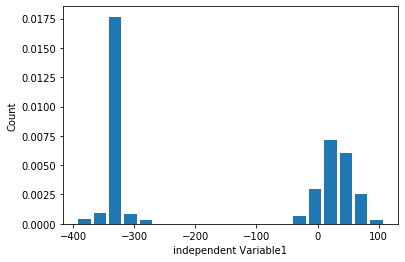

In [52]:
plt.hist(df.x0,bins=20, density=True,rwidth=0.8)
plt.xlabel('independent Variable1')
plt.ylabel('Count')
plt.show()

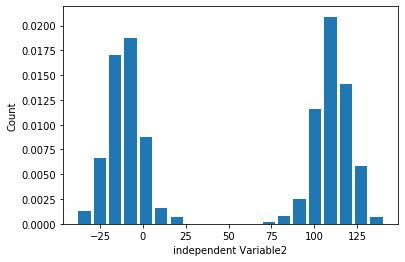

In [53]:
plt.hist(df.x1,bins=20, density=True,rwidth=0.8)
plt.xlabel('independent Variable2')
plt.ylabel('Count')
plt.show()

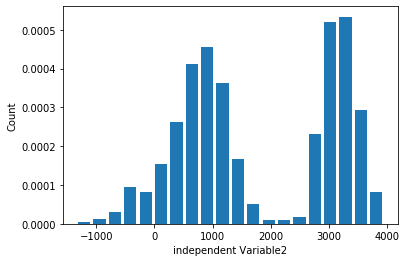

In [54]:
plt.hist(df.x2,bins=20, density=True,rwidth=0.8)
plt.xlabel('independent Variable2')
plt.ylabel('Count')
plt.show()

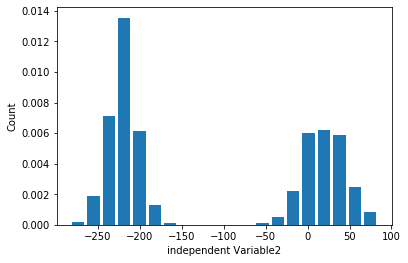

In [55]:
plt.hist(df.x3,bins=20, density=True,rwidth=0.8)
plt.xlabel('independent Variable2')
plt.ylabel('Count')
plt.show()

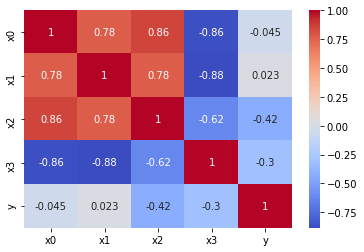

In [79]:
corr_df = df.corr()
sns.heatmap(corr_df,annot=True, cmap = 'coolwarm')
plt.show()

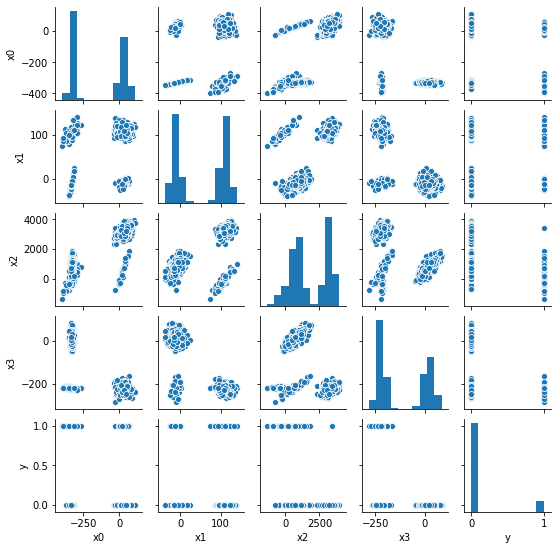

In [80]:
sns.pairplot(df,height=1.5)

In [57]:
df.head()

,x0,x1,x2,x3,y
0,-331.070808,-9.502577,1150.546337,41.414802,0
1,8.373484,118.055035,3285.208972,-208.646805,0
2,-331.069064,-13.001692,-170.948896,-48.085035,0
3,-322.432286,2.513188,1344.314314,31.998978,0
5,-322.013594,8.104774,1509.257404,35.238685,0


In [64]:
dependent_var = df['y']
independent_var = df.iloc[:,0:4]

In [65]:
independent_var

,x0,x1,x2,x3
0,-331.070808,-9.502577,1150.546337,41.414802
1,8.373484,118.055035,3285.208972,-208.646805
2,-331.069064,-13.001692,-170.948896,-48.085035
3,-322.432286,2.513188,1344.314314,31.998978
5,-322.013594,8.104774,1509.257404,35.238685
...,...,...,...,...
994,-332.855213,-14.273059,723.525256,19.030238
995,-311.840895,111.876707,202.093138,-219.195165
996,-388.530067,94.083265,-860.069680,-220.657262
997,33.385342,109.091292,3066.218437,-226.723099


In [66]:
dependent_var

0      0
1      0
2      0
3      0
5      0
      ..
994    0
995    1
996    1
997    0
999    0
Name: y, Length: 837, dtype: int64

In [67]:
dependent_var_train, dependent_var_test, independent_var_train, independent_var_test = train_test_split(dependent_var, independent_var, test_size=0.2, random_state=1)

In [68]:
dependent_var_train.head()

300    0
125    0
473    0
418    0
65     0
Name: y, dtype: int64

In [69]:
independent_var_train.head()

,x0,x1,x2,x3
300,-335.202919,-15.407092,867.484037,32.509044
125,-326.603341,-4.525588,1111.246167,28.387739
473,-337.168833,-22.435571,687.415296,31.295020
418,-329.098798,-7.589957,828.199173,14.229838
65,-6.147871,113.132259,2952.559980,-216.038339


In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(independent_var_train, dependent_var_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
lr.predict(independent_var_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [76]:
pred = lr.predict(independent_var_test)

In [77]:
score = lr.score(independent_var_test,dependent_var_test) 

In [78]:
print(score)

0.9880952380952381
